<a href="https://colab.research.google.com/github/MargaritaFateeva/Terver_matstat/blob/main/DZ08_terver%26matstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 8. Корреляционный анализ

**Задача 1** Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с
помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и
среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

РЕШЕНИЕ:

cov(x,y) = M(xy) - M(x)*M(y)

M(zp*ks)= (401*35+574*45+874*190+919*200+459*40+739*70+653*54+902*150+746*120+832*110)/10 = 81141,7

M(zp) = (35+45+190+200+40+70+54+150+120+110)/10 = 101,4

M(ks) = (401+574+874+919+459+739+653+902+746+832)/10 = 709,9

**cov(zp, ks)** = 81141,7-101,4*709,9 = 9157,84

**r(x,y)** = cov(x,y)/(q(x)*q(y)) = 9157,84/(59,115 * 174,553) = 0,88749934312

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

Используем в рассчетах смещенную ковариацию

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
np.cov(zp,ks,ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [17]:
qzp=np.std(zp,ddof=0)
qks=np.std(ks,ddof=0)
qzp, qks

(59.115480206118605, 174.55340157098058)

In [14]:
r=np.corrcoef(zp,ks)
r

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

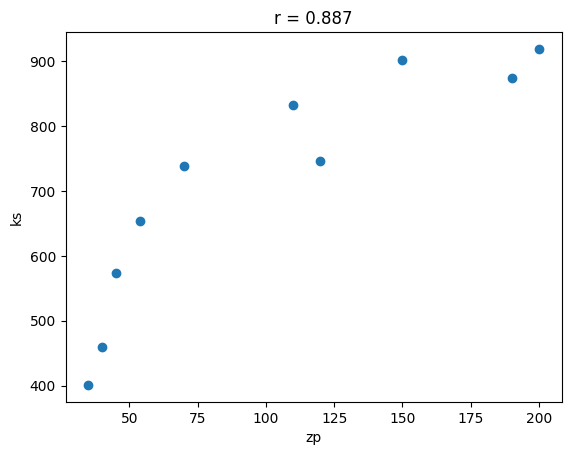

In [15]:
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 3)}')
plt.xlabel('zp')
plt.ylabel('ks')
plt.show

**Задача 2** Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

РЕШЕНИЕ:

a=0.05
n=10

xcp = (131+125+115+122+131+115+107+99+125+111)/10=118,1

Сигма неизвестна, выбираем критерий Стьюдента
xср +- t a/2 * q/n^1/2

t 0.025=2,262 - табличное значение 9 степеней свободы p=0,975

q=10.545 сигма считаем в Python

118,1-2,262 * 10,545/10^1/2 < m < 118,1+2,262 * 10,545/10^1/2

**(110,5516;125,648)** - доверительный интервал для оценки мат.ожидания генеральной соовокупности с надежностью 0.95

In [3]:
x=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha=0.05
xsr = np.mean(x)
xsr

118.1

In [4]:
q=np.std(x,ddof=1)
q

10.54566788359614

In [5]:
alpha = 0.05
n = 10
t=stats.t.ppf((1-alpha/2), df=n-1)
a = xsr-t*q/np.sqrt(n)
b = xsr+t*q/np.sqrt(n)
a, b

(110.55608365158724, 125.64391634841274)

**Задача 3** Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для
математического
ожидания с надежностью 0.95.

РЕШЕНИЕ:

D=25
a=0.05
xср=174,2
n=27
q=5

Сигма известна, выбираем Z-критерий
xср +- z a/2 * q/n^1/2

z 0.025=1.96 - табличное значение соответсвует p=0.975

174,2-1,96*5/27^1/2 < m < 174,2+1,96*5/27^1/2
174,2-1,886 < m < 174,2+1,886

**(172,314;176,086)** - доверительный интервал для оценки мат.ожидания генеральной соовокупности с надежностью 0.95

In [6]:
q=5
a=0.05
xs=174.2
n=27
z=stats.norm.ppf(0.975)
a = xs-z*q/np.sqrt(n)
b = xs+z*q/np.sqrt(n)
a, b

(172.3140237765397, 176.08597622346028)